# Exercise 3.8: Least-squares fiting and the photoelectric effect

It's a common situation in physics that an experiment produces data that lies roughly on a straight line. The straight line can be represented in the familiar form $y=mx+c$ and a frequent question is what the appropriate values of the slope $m$ and intercept $c$ are that correspond to the measured data. Since the data don't fall perfectly on a straight line, there is no perfect answer to such a question, but we can find the straight line that gives the best compromise fit to the data. The standard technique for doing this is the _method of least squares_.

Suppose we make some guess about the parameters $m$ and $c$ for the straight line. We then calculate the vertical distances between the data points and the straight line. We then calculate the sum of the squares of those distances, which we denote by $\chi^2$. If we have $N$ data points with coordinates $(x_i,y_i)$ then $\chi^2$ is given by

$$ \chi^2 = \sum^N_{i=1}(mx_i+c-y_i^2)$$

The least-squares fit of the straight line to the data is the straight line that minimizes this total squared distance from data to line. We find the minimum by differentiating with respect to both $m$ and $c$ and setting the derivatives to zero, which gives

$$m\sum^N_{i=1}x_i^2 + c\sum^N_{i=1}x_i - \sum^N_{i=1}x_iy_i = 0,$$

$$ m\sum^N_{i=1}x_i + cN - \sum^{N}_{i=1}y_i = 0.$$

For convenience, let us define the following quantities:

$$E_x = \frac{1}{N}\sum^N_{i=1}x_i,  E_y = \frac{1}{N}\sum^N_{i=1}y_i, E_{xx} = \frac{1}{N}\sum^N_{i=1}x_i^2, E_{xy}=\frac{1}{N}\sum^N_{i=1}x_iy_i$$

in terms of which our equations can be written as

$$mE_{xx} + cE_x = E_{xy},$$
$$mE_x + c = E_y.$$

Solving these equations simultaneously for $m$ and $c$ now gives 

$$ m = \frac{E_{xy}-E_xE_y}{E_{xx}-E_x^2}, c = \frac{E_{xx}E_y - E_xE_{xy}}{E_{xx}-E_x^2}.$$

These are the eqeuations for the least-squares fit of a straight line to $N$ data points. They tell you the values of $m$ and $c$ for the line that best fits the given data.

a) 
Read the data in the file [milikan.txt](http://www-personal.umich.edu/~mejn/cp/programs.html) and graph it.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
data = np.loadtxt("millikan.txt", float)
print(data[:5])
print(type(data))

[[5.48740e+14 5.30900e-01]
 [6.93100e+14 1.08420e+00]
 [7.43070e+14 1.27340e+00]
 [8.21930e+14 1.65980e+00]
 [9.60740e+14 2.19856e+00]]
<class 'numpy.ndarray'>


In [20]:
x = data[:,0] # keep it an numpy array
y = data[:,1]

#plt.figure(figsize=(10,6))
#plt.plot(x,y,'.')
#plt.show()

In [12]:
N = len(x)
Ex = sum(x)/N
Ey = sum(y)/N
Exx = sum(x**2)/N
Exy = sum(x*y)/N

m = (Exy-Ex*Ey)/(Exx-Ex**2)
c = (Exx*Ey-Ex*Exy)/(Exx-Ex**2)

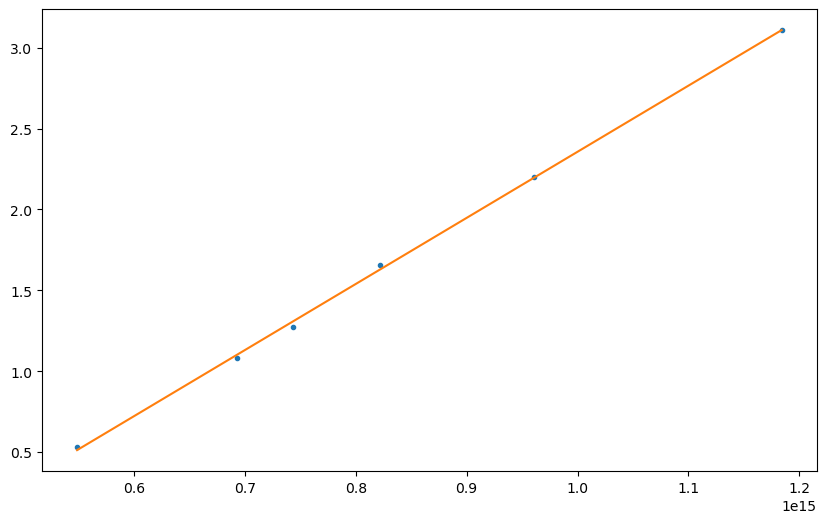

In [13]:
x_to_fit = np.linspace(x[0], x[-1], N)
y_to_fit = m*x_to_fit+c

plt.figure(figsize=(10,6))
plt.plot(x,y,'.')
plt.plot(x_to_fit, y_to_fit)
plt.show()

d)
The dat ain the file millikan.txt are take nfrom a histroic experiment by Robert Millikan that measured the _photoelectric effct_. When light of an appropriate wavelength is shone on the surface of a metal, the photons in the light can strik conduction electrons in the meatl and, sometimes, eject them from the surface into the free space above. The energy of an ejected electron is equal to the energy of the photon that struck it minus a small amount $\phi$ called the _work function_ of the surface, which represents the energy needed to remove an electron from the sruface. The energy of a photon is $hv$, where $h$ i Planck's constant and $v$ is the frequency of the light, and we can measure the energy of an ejected electron by measuring the voltage $V$ that is just sufficient to stop the electron moving. Then the voltage, frequency, and work function are related by the equation

$$ V = \frac{h}{e}v-\phi $$

where $e$ is the charge on the electron. This equation was first given by Albert Einstein in 1905. 

The data in the file millikan.txt represent frequencies $v$ in hertz (first column) and voltages $V$ in volts (second column) from photoelectric measurements of this kind. Using theequation above and the program you wrote and given that the charge on the electron is $1.602 \times 10^{-19}$C, calculate from Millikan's experimental data a value for Placnk's constant. Compare your value with accepted value of the constant, which you can find in books or on-line. You should get aresult within a couple of percent of the accepted value. 

In [18]:
e = 1.602e-19 #C
h = m*e
h_lit = 6.626e-34

error = abs(h_lit-h)/(h_lit)

print(f"From literature we know that Planck's constant is h={h_lit} J*s")
print(f"By using the least-squares method we got a result for h with an error of {round(error*100,2)}%")

From literature we know that Planck's constant is h=6.626e-34 J*s
By using the least-squares method we got a result for h with an error of 1.16%
